0.7391729354858398
1.0
0.7256946563720703
0.7302382722834697
[2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
 [ 400 / 400 ] 100% - 0:00:00 left 
 quantization error: 0.08356672262598783
0.04108738899230957
 [ 400 / 400 ] 100% - 0:00:00 left 
 quantization error: 0.6693648556965843
0.03761792182922363
1.0
0.7445264308738749


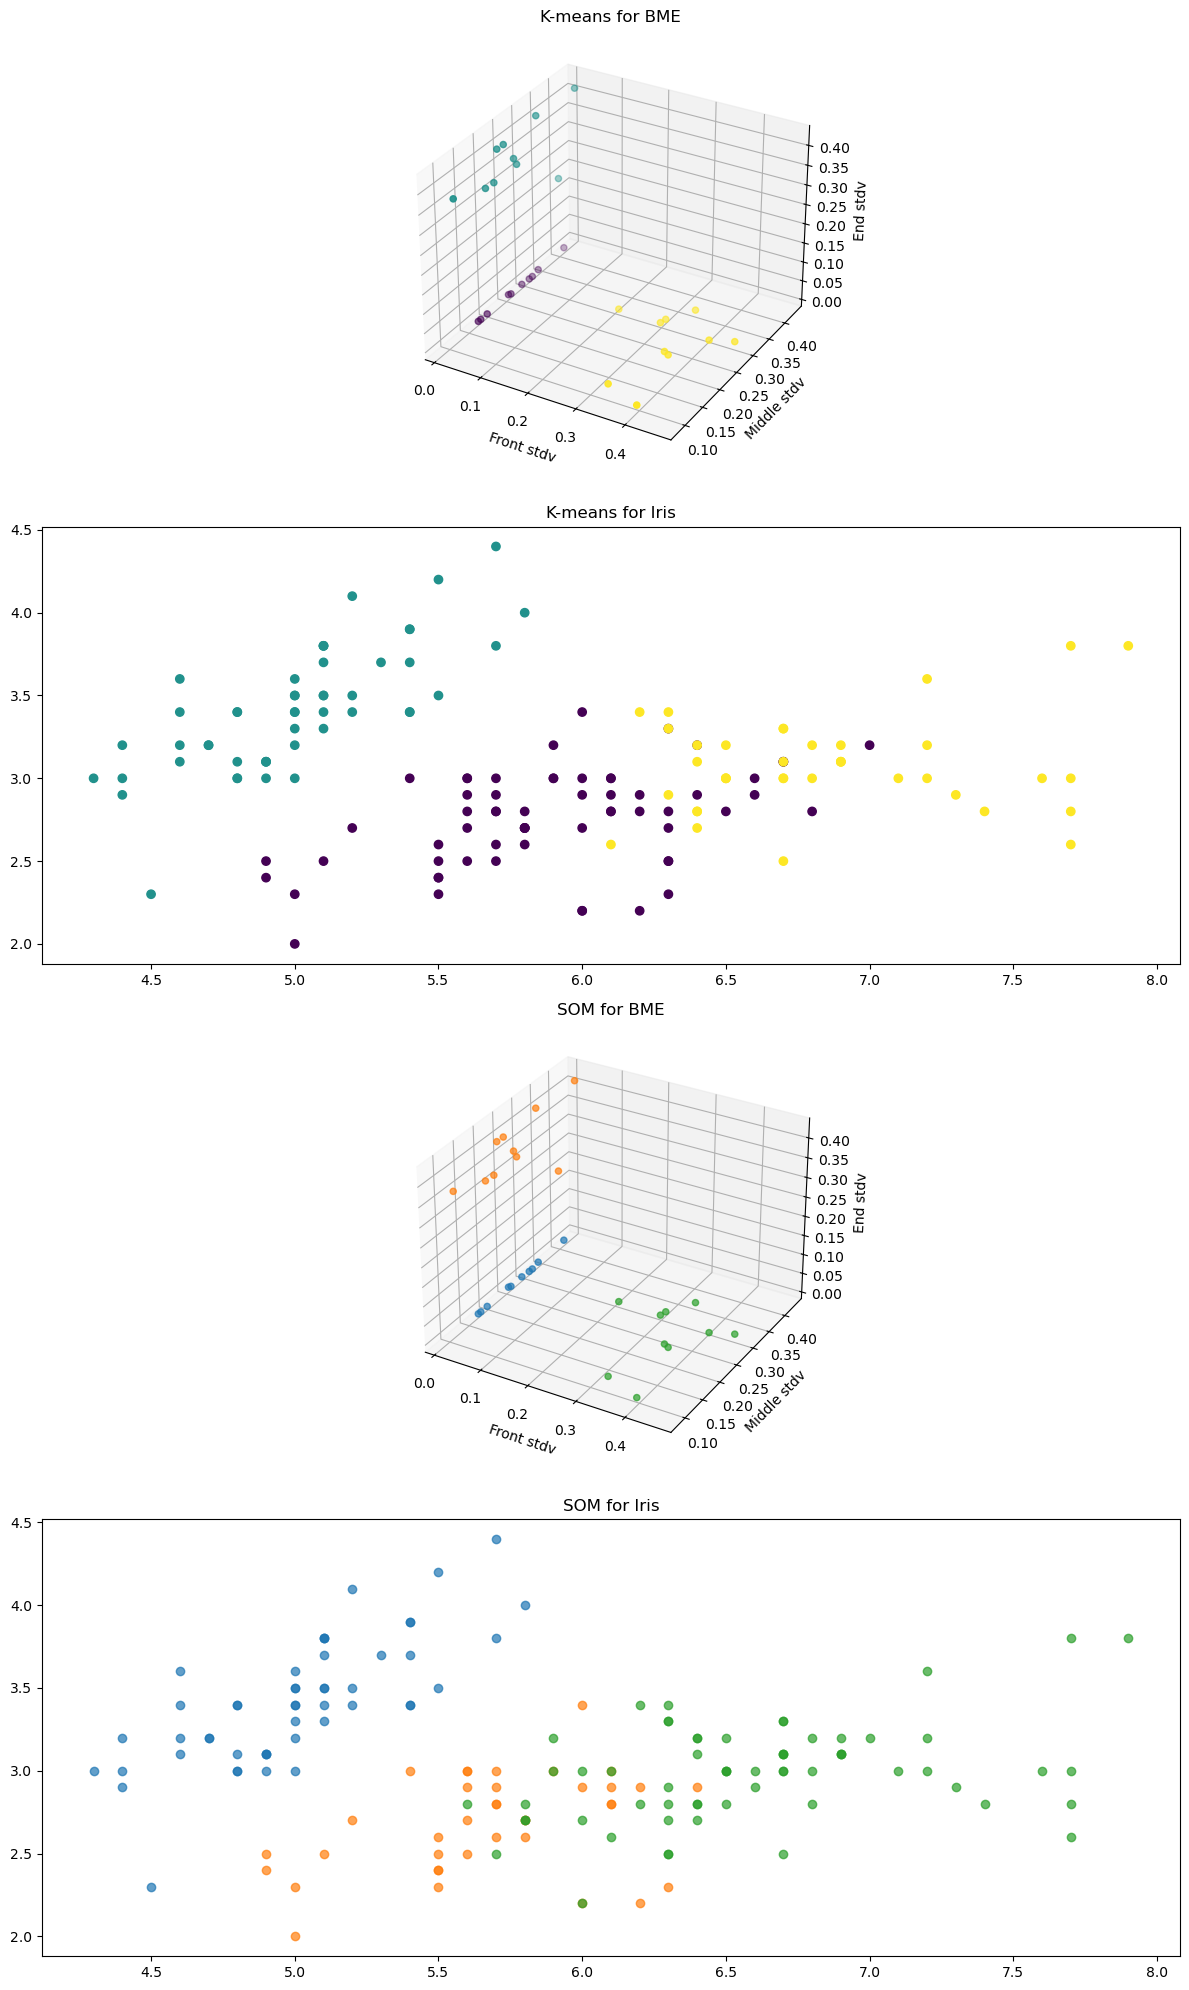

In [72]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from minisom import MiniSom
from sklearn import metrics

df1 = pd.read_excel('./dataset/BME/BME_TRAIN.xlsx')
df2 = pd.read_csv('./dataset/iris/iris.data', header = None, sep = ',')
dataBME = df1.iloc[0:30, 132:135].values
dataIris = df2.iloc[0:150, 0:4].values
BME_True = df1.iloc[0:30, 0].values
Iris_True = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

start = time.time()
kmeans_BME = KMeans(n_clusters = 3, random_state = 0, n_init = 10).fit(dataBME)
end = time.time()
print(end - start)
score = metrics.adjusted_rand_score(kmeans_BME.labels_, BME_True)
print(score)

start = time.time()
kmeans_Iris = KMeans(n_clusters = 3, random_state = 0, n_init = 10).fit(dataIris)
end = time.time()
print(end - start)
score = metrics.adjusted_rand_score(kmeans_Iris.labels_, Iris_True)
print(score)

print(kmeans_BME.labels_)
print(kmeans_Iris.labels_)
#print(kmeans_BME.cluster_centers_)


som_BME = MiniSom(1, 3, 3, sigma = 1, learning_rate = 0.1)
start = time.time()
som_BME.train_batch(dataBME, 400, verbose = True)
end = time.time()
print(end - start)

#print(som_BME.get_weights())
som_Iris = MiniSom(1, 3, 4, sigma = 1, learning_rate = 0.1)
start = time.time()
som_Iris.train_batch(dataIris, 400, verbose = True)
end = time.time()
print(end - start)

plt.figure(figsize = (12,20))
ax = plt.subplot(411, projection = '3d')
ax.set_title('K-means for BME')
ax.set_xlabel('Front stdv')
ax.set_ylabel('Middle stdv')
ax.set_zlabel('End stdv')
x = df1.iloc[0:30, 132].values
y = df1.iloc[0:30, 133].values
z = df1.iloc[0:30, 134].values
ax.scatter(x, y, z, c = kmeans_BME.labels_)
plt.tight_layout()

ax = plt.subplot(412)
ax.set_title('K-means for Iris')
x = df2.iloc[0:150, 0].values
y = df2.iloc[0:150, 1].values
plt.scatter(x, y, c = kmeans_Iris.labels_)
plt.tight_layout()

ax = plt.subplot(413, projection = '3d')
ax.set_title('SOM for BME')
ax.set_xlabel('Front stdv')
ax.set_ylabel('Middle stdv')
ax.set_zlabel('End stdv')
winner_coordinates = np.array([som_BME.winner(x) for x in dataBME]).T
#print(winner_coordinates)
cluster_index = np.ravel_multi_index(winner_coordinates, (1, 3))
score = metrics.adjusted_rand_score(cluster_index, BME_True)
print(score)
#print(cluster_index)
for c in np.unique(cluster_index):
    ax.scatter(dataBME[cluster_index == c, 0], dataBME[cluster_index == c, 1], dataBME[cluster_index == c, 2], label='cluster='+str(c), alpha=.7)
plt.tight_layout()

ax = plt.subplot(414)
ax.set_title('SOM for Iris')
winner_coordinates = np.array([som_Iris.winner(x) for x in dataIris]).T
#print(winner_coordinates)
cluster_index = np.ravel_multi_index(winner_coordinates, (2, 4))
score = metrics.adjusted_rand_score(cluster_index, Iris_True)
print(score)
#print(cluster_index)
for c in np.unique(cluster_index):
    ax.scatter(dataIris[cluster_index == c, 0], dataIris[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
plt.tight_layout()

#plt.savefig('./lab3.png')
plt.show()


14.106735979665885


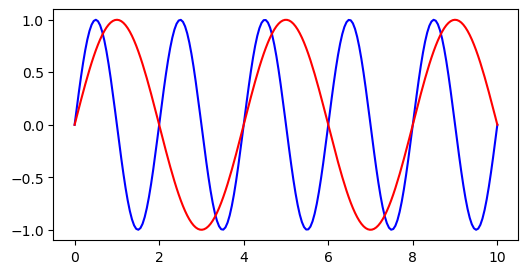

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

plt.figure(figsize = (6,3))
n = np.linspace(0, 10, 200)
x = np.sin(math.pi * n)
y = np.sin(math.pi * 0.5 * n)
plt.plot(n, x, c = 'blue')
plt.plot(n, y, c = 'red')
print(np.linalg.norm(x - y))

plt.show()
